# **Common Factors Affecting Loans at various states in the US**

## **Data Investigation**

####  I want to look into the factors or features that had an effect on amount loaned out, as well as the various people who were most likely to default a loan payment

## **Dataset Overview**

#### This ProsperLoan data set contains 113,937 loans with 81 variables on each loan

#### For simplicity of the visualization I have looked at only few variables. The main dataframe was broken down into various datasets through the projects for simplicity and for easy analysis

In [1]:
#importing the libraries used in the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#to get top 3 rows
df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


since I am dealing with a large data sets, to simplify it I'm selecting columns that I find interesting and useful in my visualisation. I will also be dropping the null values so as to avoid skewing my data

In [3]:
important_columns = ['ListingKey', 'ListingNumber', 'ListingCreationDate','Term', 
                   'LoanStatus', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                    'ProsperRating (Alpha)', 'BorrowerAPR', 'BorrowerRate','LenderYield','EstimatedLoss',
                   'EstimatedReturn','ListingCategory (numeric)', 'BorrowerState','Occupation', 
                   'EmploymentStatus', 'EmploymentStatusDuration','IsBorrowerHomeowner' ,
                   'LoanOriginalAmount','LoanOriginationDate', 'LoanOriginationQuarter',
                   'MonthlyLoanPayment','Recommendations','Investors', 'DebtToIncomeRatio',
                   'StatedMonthlyIncome', 'IncomeRange']

In [4]:
#created a new dataframe from the list created above this was used to simplify the data for easy visualisation
loans_df = df[important_columns]
loans_df.shape

(113937, 28)

In [5]:
#to get top 5 rows in the dataset
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperRating (Alpha),BorrowerAPR,BorrowerRate,...,IsBorrowerHomeowner,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,Investors,DebtToIncomeRatio,StatedMonthlyIncome,IncomeRange
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,640.0,659.0,NaN,0.16516,0.1580,...,True,9425,2007-09-12 00:00:00,Q3 2007,330.43,0,258,0.17,3083.333333,"$25,000-49,999"
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,680.0,699.0,A,0.12016,0.0920,...,False,10000,2014-03-03 00:00:00,Q1 2014,318.93,0,1,0.18,6125.000000,"$50,000-74,999"
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,480.0,499.0,NaN,0.28269,0.2750,...,False,3001,2007-01-17 00:00:00,Q1 2007,123.32,0,41,0.06,2083.333333,Not displayed
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,800.0,819.0,A,0.12528,0.0974,...,True,10000,2012-11-01 00:00:00,Q4 2012,321.45,0,158,0.15,2875.000000,"$25,000-49,999"
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,680.0,699.0,D,0.24614,0.2085,...,True,15000,2013-09-20 00:00:00,Q3 2013,563.97,0,20,0.26,9583.333333,"$100,000+"


In [6]:
loans_df.isnull().sum().sum()

115996

In [7]:
#checking the datatypes of all columns
loans_df.dtypes

ListingKey                    object
ListingNumber                  int64
ListingCreationDate           object
Term                           int64
LoanStatus                    object
CreditScoreRangeLower        float64
CreditScoreRangeUpper        float64
ProsperRating (Alpha)         object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
EstimatedLoss                float64
EstimatedReturn              float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
LoanOriginalAmount             int64
LoanOriginationDate           object
LoanOriginationQuarter        object
MonthlyLoanPayment           float64
Recommendations                int64
Investors                      int64
DebtToIncomeRatio            float64
StatedMonthlyIncome          float64
I

### **What is/are the main feature(s) of interest in your dataset?**
I'm interested in knowing what type of people default loans, and the correlation among some series.

In [8]:
#removing all the null values from the dataframe
loans_df = loans_df.dropna()


In [9]:
#to confirm if the null values where removed

loans_df.isnull().sum().sum()

0

In [10]:
loans_df['Term'].unique()

array([36, 60, 12], dtype=int64)

In [11]:
#to get statistical information about each column in the dataset
loans_df.describe()

,ListingNumber,Term,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ListingCategory (numeric),EmploymentStatusDuration,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors,DebtToIncomeRatio,StatedMonthlyIncome
count,7.621600e+04,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,7.737463e+05,42.760470,699.273643,718.273643,0.223901,0.193621,0.183616,0.078611,0.095528,3.302259,104.578028,9294.999410,296.421859,0.016571,69.998517,0.258032,6002.833586
std,2.344166e+05,11.744005,47.280236,47.280236,0.079372,0.074088,0.074088,0.046047,0.030031,4.396670,95.836443,6413.404265,189.674943,0.187732,97.801415,0.320587,5110.743506
min,4.162750e+05,12.000000,600.000000,619.000000,0.045830,0.040000,0.030000,0.004900,-0.181600,0.000000,0.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.250000
25%,5.603650e+05,36.000000,660.000000,679.000000,0.161570,0.134900,0.124900,0.042000,0.074080,1.000000,32.000000,4000.000000,159.062500,0.000000,1.000000,0.150000,3583.333333
50%,7.425500e+05,36.000000,700.000000,719.000000,0.215660,0.184500,0.174500,0.069900,0.091100,1.000000,76.000000,8000.000000,257.760000,0.000000,32.000000,0.220000,5041.666667
75%,9.747142e+05,60.000000,720.000000,739.000000,0.287800,0.254900,0.244900,0.108000,0.115000,3.000000,150.000000,14603.250000,392.420000,0.000000,100.000000,0.320000,7250.000000
max,1.255149e+06,60.000000,880.000000,899.000000,0.423950,0.360000,0.340000,0.366000,0.266700,20.000000,755.000000,35000.000000,2251.510000,19.000000,1189.000000,10.010000,483333.333333


In [12]:
#Getting the average creditscore of each borrower 
loans_df['CreditScoreValue'] =  (df['CreditScoreRangeLower']+df['CreditScoreRangeUpper'])/2
loans_df.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)


In [13]:
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ProsperRating (Alpha),BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,...,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,Investors,DebtToIncomeRatio,StatedMonthlyIncome,IncomeRange,CreditScoreValue
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,A,0.12016,0.0920,0.0820,0.0249,...,10000,2014-03-03 00:00:00,Q1 2014,318.93,0,1,0.18,6125.000000,"$50,000-74,999",689.5
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,A,0.12528,0.0974,0.0874,0.0249,...,10000,2012-11-01 00:00:00,Q4 2012,321.45,0,158,0.15,2875.000000,"$25,000-49,999",809.5
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,D,0.24614,0.2085,0.1985,0.0925,...,15000,2013-09-20 00:00:00,Q3 2013,563.97,0,20,0.26,9583.333333,"$100,000+",689.5
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,60,Current,B,0.15425,0.1314,0.1214,0.0449,...,15000,2013-12-24 00:00:00,Q4 2013,342.37,0,1,0.36,8333.333333,"$100,000+",749.5
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,36,Current,E,0.31032,0.2712,0.2612,0.1275,...,3000,2013-04-18 00:00:00,Q2 2013,122.67,0,1,0.27,2083.333333,"$25,000-49,999",689.5


Next is to visualize; 



## **How many loan applicants own a house**




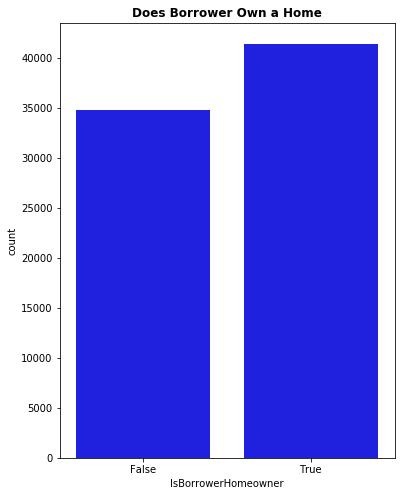

In [14]:
#plotting a countplot to show the variation of lenders and their house owing status
plt.figure(figsize = [6, 8])
plt.title('Does Borrower Own a Home', fontweight="bold")
sb.countplot(data=loans_df, x='IsBorrowerHomeowner', color = "b");

From the above plot, we can say that most people that come for loans are existing house owners

### **What percentage of Applicants defaulted payment?**

In [15]:
loans_df['did_they_default'] = pd.get_dummies(df['LoanStatus']) ['Defaulted']
loans_df['did_they_default'].value_counts(normalize=True) * 100

0    98.838826
1     1.161174
Name: did_they_default, dtype: float64

Observation - We can see from above that 1.16% of lenders defaulted payment, this shows that majority of the borrowers are not defaulters 

### **Distribution of borrowers credit ratings**

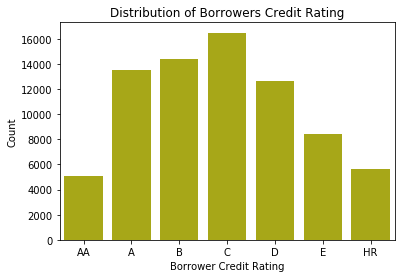

In [16]:
def cred_ratings(n):
    rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
    sb.countplot(data = n, x = 'ProsperRating (Alpha)', color = "y", order = rating_order)
    plt.xlabel('Borrower Credit Rating')
    plt.ylabel('Count')
    plt.title('Distribution of Borrowers Credit Rating')
    plt.show();
cred_ratings(loans_df)

Observation - We can see that loans are widely spread across mid/average credit ratings, and shows that highly rated and poorly rated loans are not so often disbursed to loan applicants.

**Note: AA - highly rated loans and keeps reducing till HR - poorly rated loans(or popularly known as subprime loans)**

In [17]:
#getting an insight into the loansatus data
loans_df['LoanStatus'].value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

### **Distribution of Defaulters borrowers credit ratings**

In [18]:
#Diving deeper into the defaulters
defaulters = loans_df[loans_df['LoanStatus'] == 'Defaulted']
defaulters.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ProsperRating (Alpha),BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,...,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,Investors,DebtToIncomeRatio,StatedMonthlyIncome,IncomeRange,CreditScoreValue,did_they_default
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,36,Defaulted,HR,0.35797,0.3177,0.3077,0.1650,...,2012-04-19 00:00:00,Q2 2012,173.71,0,10,0.49,5500.000000,"$50,000-74,999",709.5,1
23,101B35764008108187B2EBA,758964,2013-04-22 13:29:19.073000000,36,Defaulted,D,0.28032,0.2419,0.2319,0.1075,...,2013-04-26 00:00:00,Q2 2013,78.67,0,30,0.39,2500.000000,"$25,000-49,999",689.5,1
107,10BE354254173728633D033,573446,2012-03-29 12:17:10.017000000,36,Defaulted,HR,0.35797,0.3177,0.3077,0.1650,...,2012-04-23 00:00:00,Q2 2012,173.71,0,13,0.54,2833.333333,"$25,000-49,999",729.5,1
138,11273541569159931E84F17,569000,2012-03-16 09:22:33.393000000,36,Defaulted,E,0.33973,0.2999,0.2899,0.1490,...,2012-03-21 00:00:00,Q1 2012,127.34,0,31,0.35,3750.000000,"$25,000-49,999",629.5,1
179,0F1E35343868130956BD68F,544844,2011-12-16 03:50:25.970000000,36,Defaulted,E,0.34731,0.3073,0.2973,0.1490,...,2011-12-20 00:00:00,Q4 2011,235.69,0,45,0.13,4583.333333,"$50,000-74,999",669.5,1


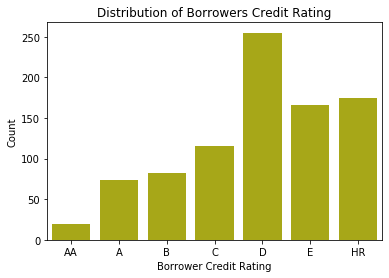

In [19]:
cred_ratings(defaulters)

#### Observation

This shows that the majority of the loans distributed out to the defaulters are usually subprime loans (low quality) from grade C and above, this should be checked as a reason could be that most defaulters already have a low credit default score before they applied for the loans. 

### **What are the average credit scores of each Loan Status (from completed to defaulters)?**

In [20]:
#function taking the plot parameters for each plots below
def plot_parameters(title, title_fontsize, ylabel, ylabel_fontsize, xlabel, xlabel_fontsize):
    plt.title(title, fontsize=title_fontsize)
    plt.ylabel(ylabel, fontsize=ylabel_fontsize)
    plt.xlabel(xlabel, fontsize=xlabel_fontsize);

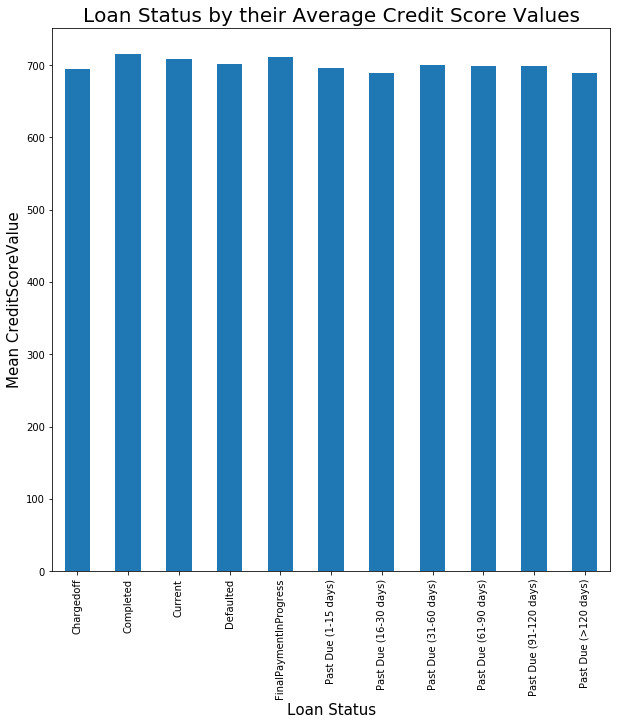

In [21]:
creditscoreavg = loans_df.groupby(['LoanStatus']).CreditScoreValue.mean()
creditscoreavg.plot(kind='bar', figsize=(10,10))
plot_parameters('Loan Status by their Average Credit Score Values', 20.0, 'Mean CreditScoreValue', 15.0, 'Loan Status', 15.0)

#### Observation 

The credit scores across the various Loan Statuses range across similar values, showing there is little or no effect credit score range has on current loan status of the applicants

### **What are the average borrowersAPR of each Loan Status (from completed to defaulters)?**

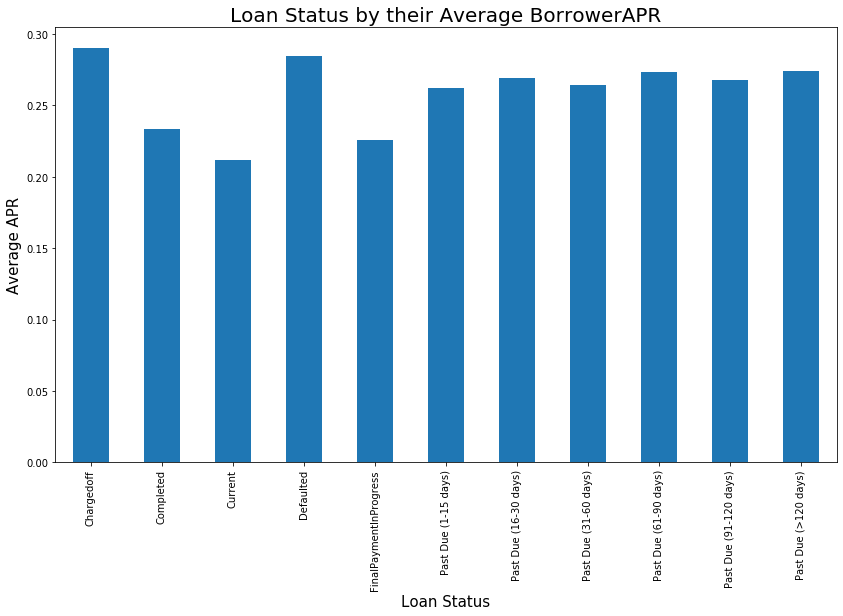

In [22]:
borrowersAPRavg = loans_df.groupby(['LoanStatus']).BorrowerAPR.mean()
borrowersAPRavg.plot(kind='bar', figsize=(14, 8))
plot_parameters('Loan Status by their Average BorrowerAPR', 20.0, 'Average APR', 15.0, 'Loan Status', 15.0)

Observation 

This shows that the average APR of applicants who have their status as either defaulters, past due or charged off were given really high rates, this goes further to explain why the defaulters were mostly lended subprime loans as given a higher interest rate by the lender helps offset the high risk/probability of the borrower defaulting on the Loan

### **Which state defaulted the most with the Loans?**

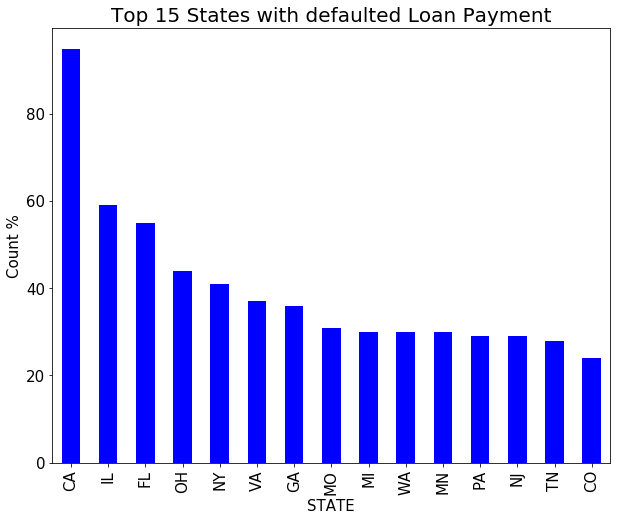

In [23]:
#state of borrowers who defaulted loan payment ploting only the top 15
state_defaults = defaulters['BorrowerState'].value_counts()[:15]
state_defaults.plot(kind = 'bar', figsize=(10,8), fontsize = 15.0, color = "b")
plot_parameters('Top 15 States with defaulted Loan Payment', 20.0, 'Count %', 15.0, 'STATE', 15.0)

Observation - From the above, we can clearly see that the state with the most default as regards loan payment is California(CA)

In [24]:

#A state dataframe was created that consisted of state and the percentage of defaulters.
#The idea was to get the relative percentages of the defaulting states compared with the number of lenders per state

state = list(defaulters['BorrowerState'].unique())
percentage_defauters = []
for i in state:
    loanee = loans_df[loans_df['BorrowerState'] == i].shape[0]
    defaulter = defaulters[defaulters['BorrowerState'] == i].shape[0]
    percentage = (defaulter/loanee) * 100
    percentage_defauters.append(percentage)

series = pd.Series(data = percentage_defauters, index = state)
state_df = pd.DataFrame({'state':series.index, 'percentage_of_defaulters':series.values})
state_df.sort_values(by=['percentage_of_defaulters'], inplace=True, ascending=False)
state_df

,state,percentage_of_defaulters
33,SD,3.636364
8,RI,3.457447
22,NM,2.730375
21,TN,2.005731
5,MO,1.949686
4,MN,1.930502
31,MS,1.833333
6,KS,1.677419
15,CO,1.559454
20,WA,1.558442


### **Which state is most likely to default payment?**

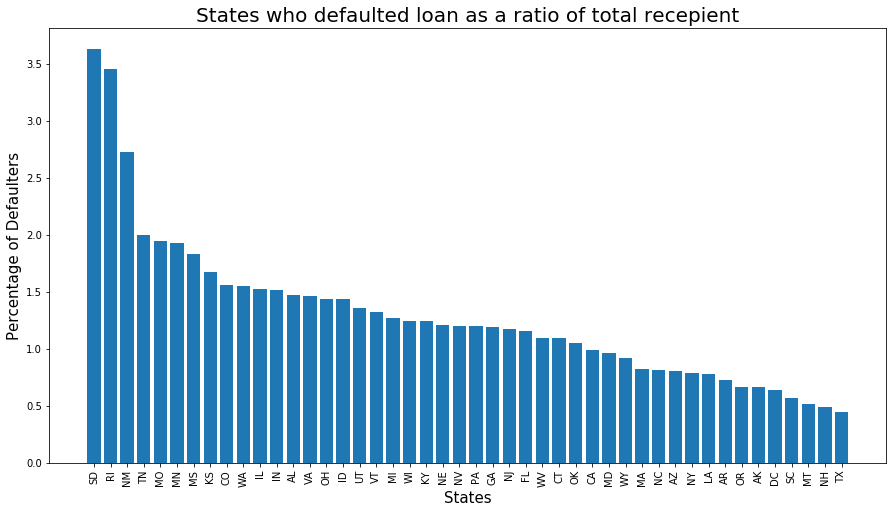

In [25]:
plt.figure(figsize = (15,8))
plt.bar(state_df['state'], state_df['percentage_of_defaulters'])
plt.xticks(rotation = 90)
plot_parameters('States who defaulted loan as a ratio of total recepient', 20.0, 'Percentage of Defaulters', 15.0, 'States', 15.0)

### New Observation 

Contrary to what was discovered earlier from the 'Which state defaulted the most with the Loans?' graph. where 'CA' had the highest number of defaulters, we can see from the plot of the relative proportion of defaulter to loanees shown above that the earlier plot occured only due to 'CA' high number of loan recepients. A new plot shown above done based on the ratio of deafuters to the ratio of loan recepients can clearly show that although CA was very hgh it was not likely for a loan recepient  in CA to deafult as they had a ratio less than 1,

 Although states SD and RI were not in the first plot(ie top 15 in number of defaulters), their loan receipients were the most likely to default with a ratio above 3 for both.
 
 #### Conclusion
 
 A survey into the top 3 states should be made into checking why their relative proportion for defaulters is that high, lenders might want to look into this.

In [26]:
#insight into the occupations column of the defaulters dataframe

defaulters['Occupation'].value_counts()

Other                                240
Professional                         109
Administrative Assistant              57
Clerical                              39
Retail Management                     31
Teacher                               28
Skilled Labor                         25
Computer Programmer                   24
Nurse (RN)                            24
Accountant/CPA                        22
Laborer                               21
Construction                          20
Sales - Commission                    18
Analyst                               18
Executive                             16
Sales - Retail                        15
Civil Service                         14
Military Enlisted                     13
Police Officer/Correction Officer     12
Truck Driver                          12
Food Service Management               10
Medical Technician                     9
Food Service                           9
Postal Service                         7
Engineer - Mecha

### **What occupation defaulted payment the most?**

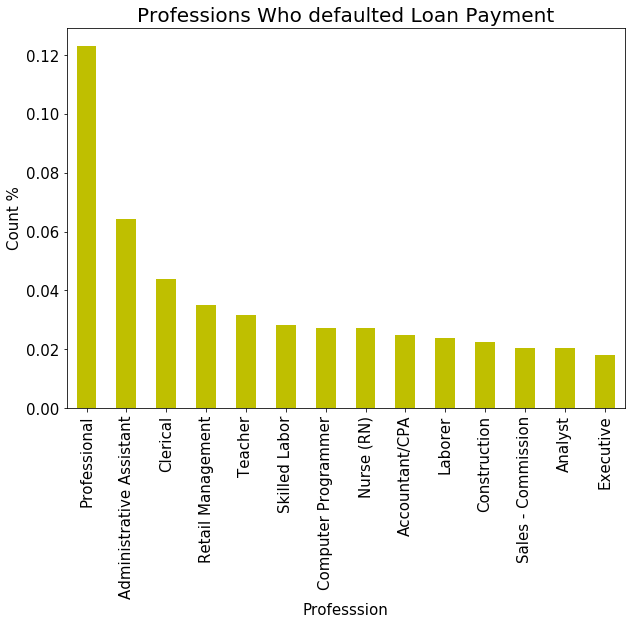

In [27]:
#we graded occupations of deafulters and excused the one termed 'others' as this contains a wide variation
#and might have effect on our analysis. ploting only the top 15

defaulters['Occupation'].value_counts(normalize = True)[1:15].plot.bar(figsize=(10,7), fontsize = 15.0, color = "y")
plt.title('Professions Who defaulted Loan Payment', fontsize = 20.0)
plt.ylabel('Count %', fontsize = 15.0)
plt.xlabel('Professsion', fontsize = 15.0);

From the above plot we can say professional had the highest number of defaulters.

### **How is the Amount loaned out spread out? For this we don't consider any value as an outlier as it will have an effect on our analysis and story telling.**

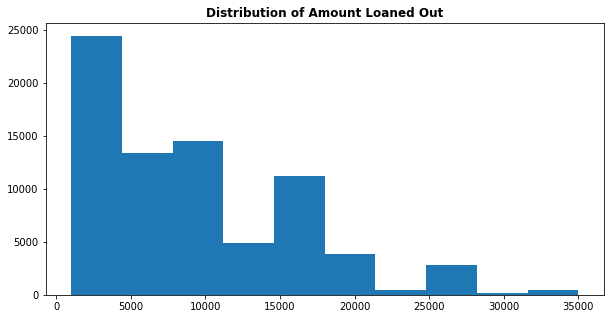

In [28]:
plt.figure(figsize = [10, 5])
plt.title('Distribution of Amount Loaned Out', fontweight="bold")
plt.hist(loans_df['LoanOriginalAmount']);

From the above diagram we can say that the average and mode of amount loaned out is in the lower boundary(i.e below the median value). There are also values at the far right which act like outliers but are considered to show that the amount loaned out has a wide range

### **What was the majority of the loans used for?**

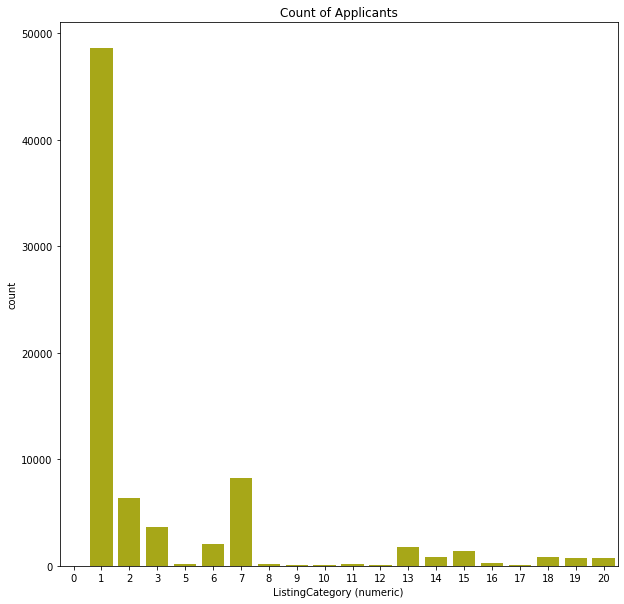

In [29]:
plt.figure(figsize = [10, 10])
sb.countplot(data = loans_df, x = 'ListingCategory (numeric)', color = "y")
plt.title('Count of Applicants');

#### The category of the listing that the borrower selected when posting their listing: 

0 - Not Available,
1 - Debt Consolidation, 
2 - Home Improvement, 
3 - Business, 
4 - Personal Loan,
5 - Student Use,
6 - Auto,
7- Other,
8 - Baby&Adoption,
9 - Boat,
10 - Cosmetic Procedure
11 - Engagement Ring,
12 - Green Loans,
13 - Household Expenses,
14 - Large Purchases,
15 - Medical/Dental,
16 - Motorcycle,
17 - RV,
18 - Taxes,
19 - Vacation,
20 - Wedding Loans

##### Observation 

With that explained, Debt consolidation had the highest purpose of loan followed by others and to complete the top 3 was home improvement...
We might also want to look at why existing debtors are being giving so much loans just to repay existing debts (entering debt to pay for debts), financial institutions might want to look into this as it could be a ticking time bomb for them if the defaulters eventually refuse to pay

### **What values have an effect on the amount loaned? How does the various numeric value correlate with one another.**

##### The variables are : 'StatedMonthlyIncome', 'Recommendations', 'EmploymentStatusDuration', 'BorrowerRate', 'EstimatedReturn', 'DebtToIncomeRatio'

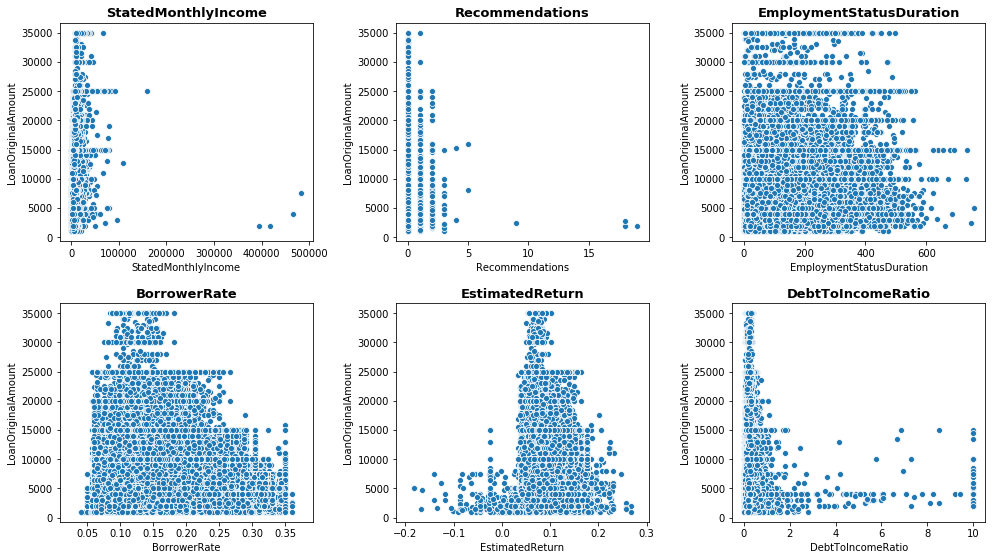

In [30]:
#created a list of variables that should have effect on amount loaned. their correlation was inspected 
comparator = ['StatedMonthlyIncome', 'Recommendations', 'EmploymentStatusDuration', 'BorrowerRate', 'EstimatedReturn', 'DebtToIncomeRatio'] 
figure1 = plt.figure(figsize = [14, 8])
j=1

for item in comparator:
    plt.subplot(int(str(23)+str(j)))
    sb.scatterplot(data = loans_df, x= item , y= 'LoanOriginalAmount' )
    plt.title(item, fontweight="bold", fontsize = 13.0)
    j+=1
    
figure1.tight_layout(pad= 1.5);

In [31]:
#a list of numerical values was used to compare their correlation with each other
numerical_cols = ['StatedMonthlyIncome', 'Recommendations', 'EmploymentStatusDuration', 'EstimatedReturn', 'Term', 'LoanOriginalAmount','BorrowerRate', 'DebtToIncomeRatio'] 

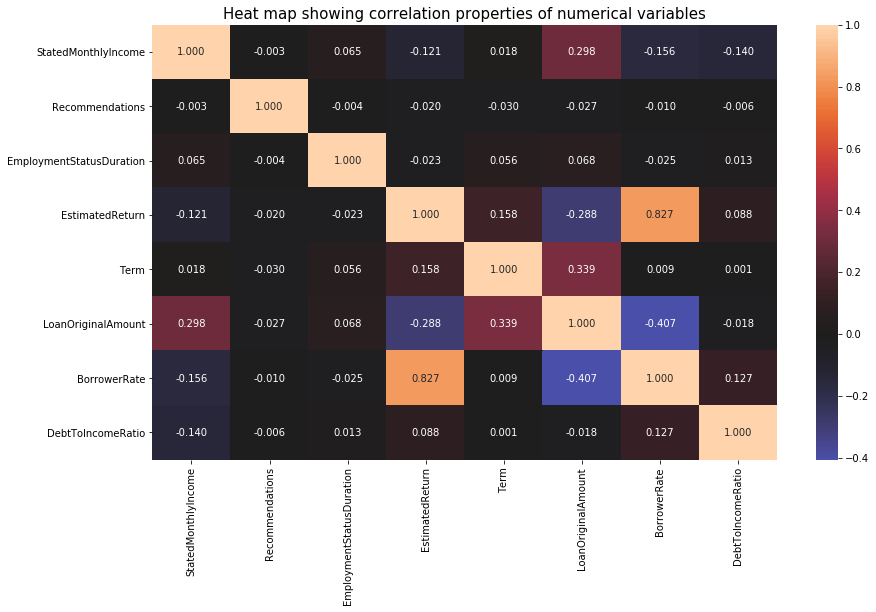

In [32]:
plt.figure(figsize = [14, 8])
sb.heatmap(loans_df[numerical_cols].corr(), annot = True, fmt = '.3f',
            center = 0)
plt.title('Heat map showing correlation properties of numerical variables', fontsize = 15.0)
plt.show()

#### Observation

As we saw from the first scatterplot and also the heatmap there is very little correlation among the numerical values and the amount borrowed. That is the amount borrowed is not so dependent on the aforementioned variables.

from the heat map above we can say that the 'estimated retun' and 'borrowed rate' have the highest correlation as we can say the higher the borrowed rate, the higher the expected estimated return.

Also borrower rate is negatively correlated with loan amount. this means the higher the loaned amount the lesser the borrower rate set.





### **Variation of amount loaned out across various Income ranges.**

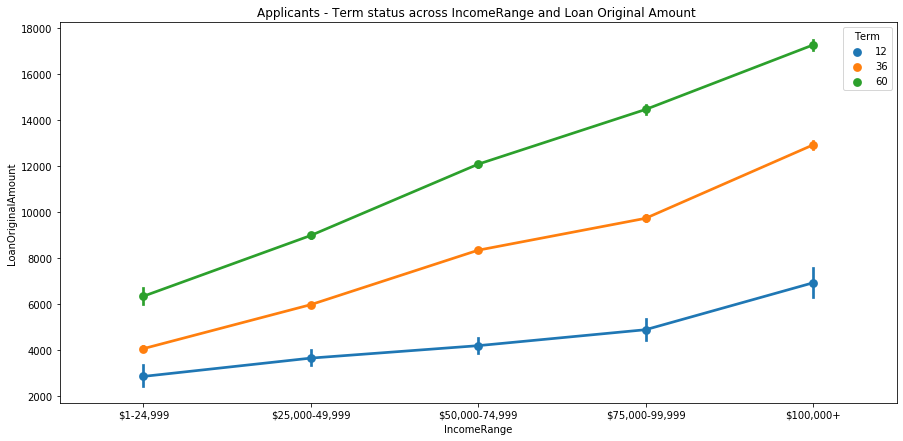

In [33]:
income_order=['Not employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
income_order_employed=['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

#graph on income range and loan amount across Applicants
plt.figure(figsize = [15, 7])
sb.pointplot(data = loans_df[loans_df['EmploymentStatus']=='Employed'], x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term',
            order=income_order_employed);
plt.title('Applicants - Term status across IncomeRange and Loan Original Amount ');

#### Observation

We can notice a positive correlation/relationship between income range and loan original Amount. 
People with the highest income borrowed the highest amount of money(or were borrowed the most) and those within the lowest range borrowed the lowest(or were not as privy as higher income range bands) and this trend can be seen across all the various terms of loan maturity 

### **How much loan did each different loan status collect. Whats the variation of some cateories across all the loan status**

In [34]:
def multivariate_exploration(categories, palettes):
    figure = plt.figure(figsize = [20, 12])
    i=1

    for category in categories:
        plt.subplot(int(str(21)+str(i)))
        sb.barplot(data = loans_df, x = 'LoanStatus', y='LoanOriginalAmount', hue = category, palette = palettes[i-1])
        plt.title('Loan Amount plotted against Loan status hued by {}'.format(category), fontweight="bold", fontsize = 20.0)
        plt.grid(axis = 'y')
        plt.xlabel('Loan Status',fontsize = 20)
        plt.ylabel('LoanOriginalAmount',fontsize = 20)
        plt.xticks(rotation = 90)
        i+=1
    figure.tight_layout(pad= 1.5);

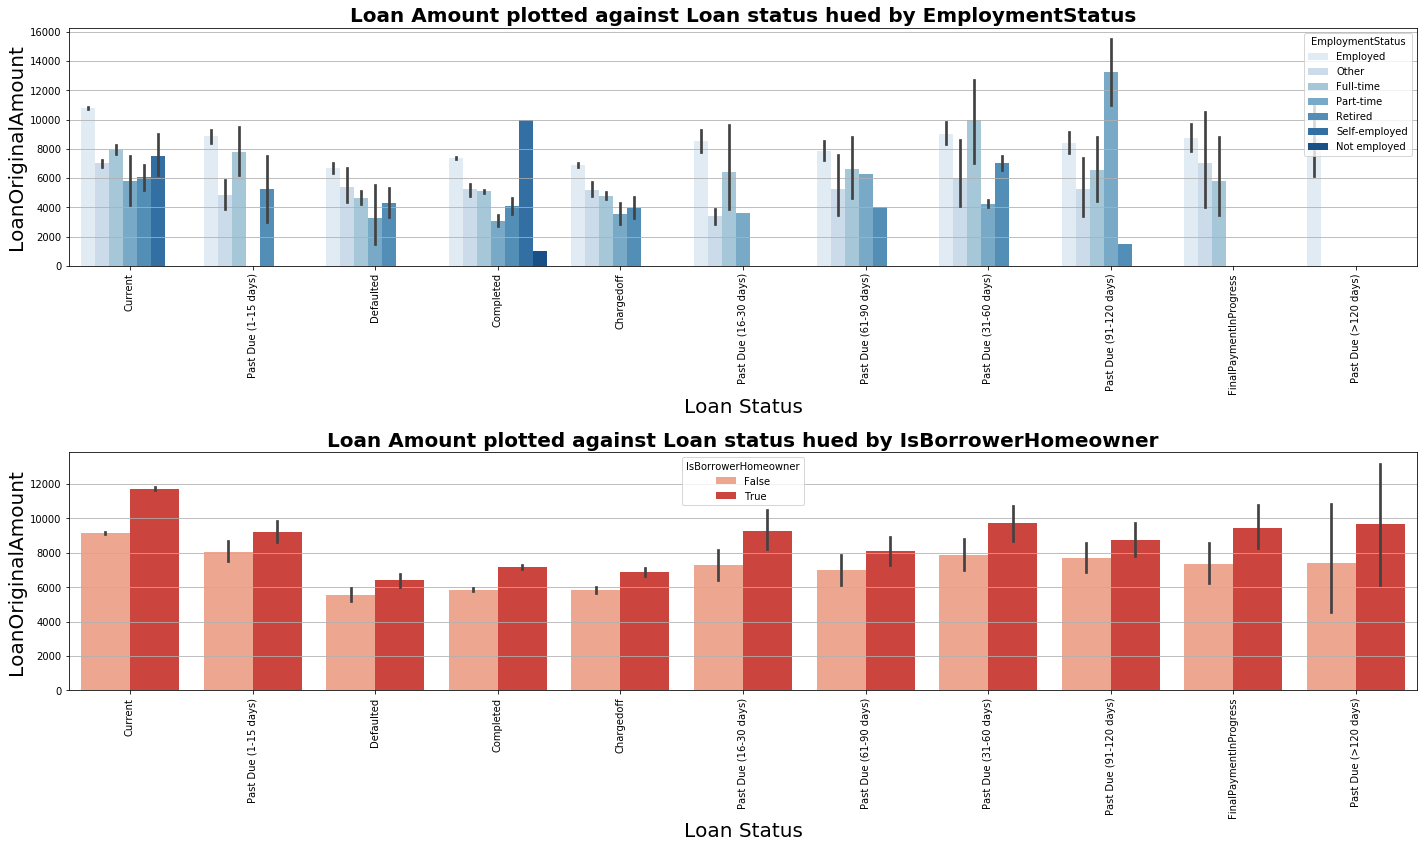

In [35]:
categories_vars1 = ['EmploymentStatus', 'IsBorrowerHomeowner']
palette1 =['Blues', 'Reds'] 
multivariate_exploration(categories_vars1, palette1)

#### Observation 

- We notice from the plots above that higher loan amounts are given to applicants with proof of stable jobs compared to unemployed applicants.

- We also see that applicants that are existing home owners tend to be given higher preference with higher loan amounts compared to applicants that are not home owners.

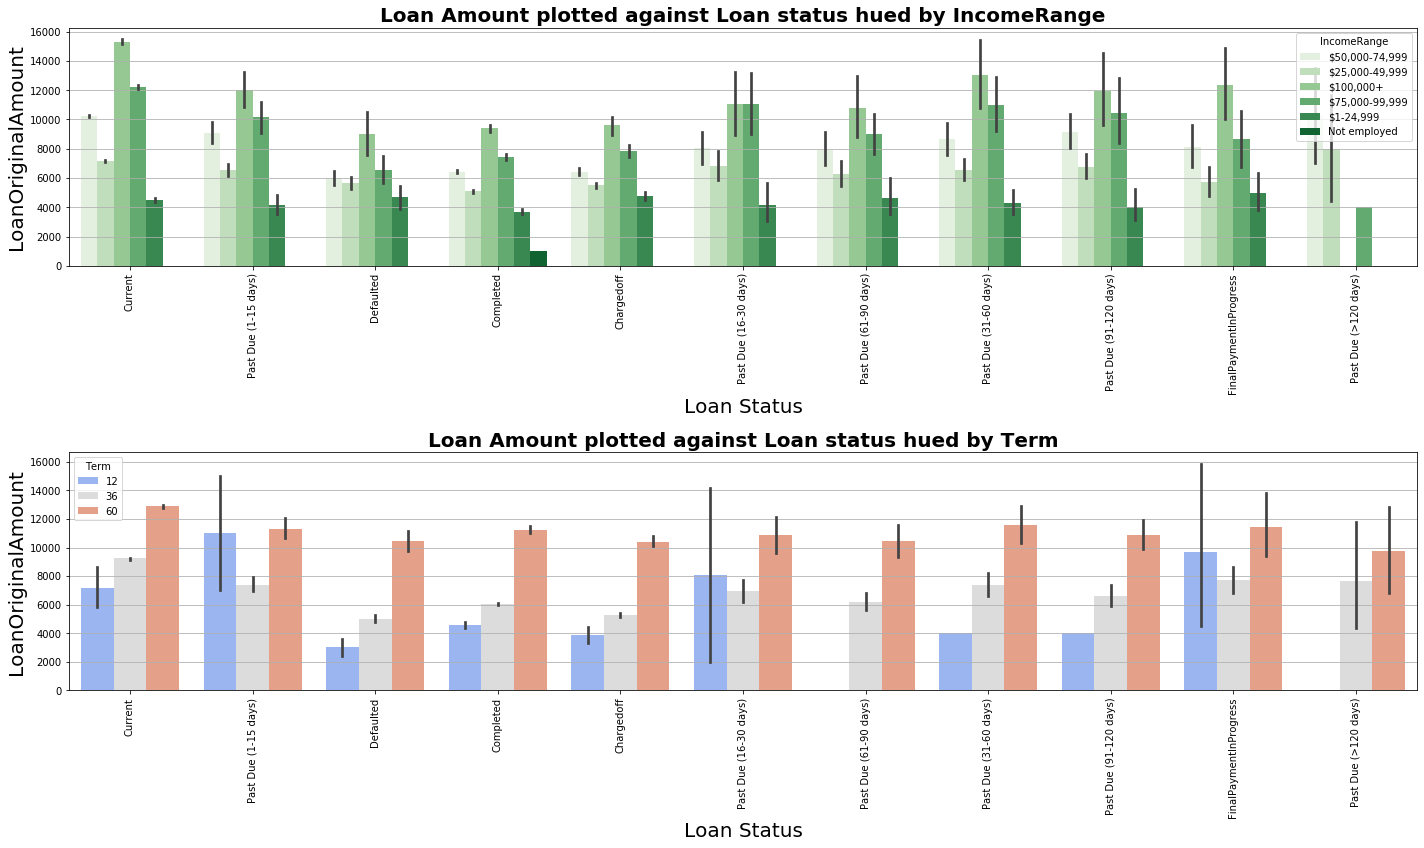

In [36]:
categories_vars2 = ['IncomeRange', 'Term']
palette2 = ['Greens','coolwarm']
multivariate_exploration(categories_vars2, palette2)

#### Observation 

- We can see that applicants with higher earning income bands tend to apply for higher loan amounts and are usually successful in the application compared to low income earners.

- We can also see that generally, applicants for higher loan amounts almost always tend to go for loan terms generally longer (60months) compared to smaller terms of say 12 months

## **Summary and Observations**

All null values were removed for easy analysis

Not all applicants are emloyed

For defaulters, majority of the loan types given to them fall under the category of poorly rated loans, with only very few of them given highly rated loans.

Majority of the loan applicants income range are from 100k and greater with emloyed status

The distribution of amount loaned of applicants is right skewed because there are few applicants with high loan demand.

LoanStatus with "current" and "completed" have their own homes as at when they applied for loans

"Professional" as an occupation had the highest number of defaulters.
 
Based on the ratio of deafuters to the ratio of loan recepients RD and SI states are the most likely to default payment

The major reason for loan collection by most of the applicants was for "Debt Consolidation" by a great amount, this might want to be looked at.

# **THANK YOU**

In [40]:
!jupyter nbconvert Data_Viz_Part_2_.ipynb --to slides --post serve --no-input --no-prompt

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'Data_Viz_Part_2_.ipynb' matched no files
